# Exercise 4
Given this dataset of spotty heart rate values, calculate my 11 second moving heart rate which is centered on a given data point. That is, the heart rate for time 1:10 should be the average of points from 1:15 through 1:25 inclusive. Interpolate missing observations in your calculation, and include the first and last five seconds in the calculation using only whatever data you have available.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
df=pd.read_csv("datasets/run.csv")[["heart_rate","timestamp"]]
df=df.sample(round(len(df)/2))
df.head()

,heart_rate,timestamp
1232,155.0,2019-08-21 03:44:50
1033,159.0,2019-08-21 03:41:31
1991,162.0,2019-08-21 03:57:29
1569,159.0,2019-08-21 03:50:27
451,148.0,2019-08-21 03:31:47


In [7]:
#convert index
df.set_index(pd.to_datetime(df['timestamp']))['heart_rate'].head()

timestamp
2019-08-21 03:44:50    155.0
2019-08-21 03:41:31    159.0
2019-08-21 03:57:29    162.0
2019-08-21 03:50:27    159.0
2019-08-21 03:31:47    148.0
Name: heart_rate, dtype: float64

In [8]:
df.set_index(pd.to_datetime(df['timestamp'])).resample("1S").asfreq()#.fillna(method='ffill').rolling(11).apply(np.mean).plot()

,heart_rate,timestamp
timestamp,,
2019-08-21 03:24:16,119.0,2019-08-21 03:24:16
2019-08-21 03:24:17,NaN,NaN
2019-08-21 03:24:18,NaN,NaN
2019-08-21 03:24:19,122.0,2019-08-21 03:24:19
2019-08-21 03:24:20,NaN,NaN
2019-08-21 03:24:21,NaN,NaN
2019-08-21 03:24:22,NaN,NaN
2019-08-21 03:24:23,119.0,2019-08-21 03:24:23
2019-08-21 03:24:24,NaN,NaN


In [ ]:
#interpoloate - predict line and plot 
df.set_index(pd.to_datetime(df['timestamp'])).resample("1S").asfreq().sort_index().interpolate()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


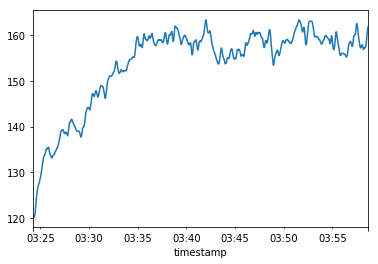

In [14]:
'''
resampling = get you nans = some object date time index sampler
asfreq = get u dadta frame with get me frequency of 1 second - run the resampling 
sort by index
'''


df.set_index(pd.to_datetime(df['timestamp']))['heart_rate'].resample("1s").asfreq().sort_index().interpolate().rolling(11, center = True, min_periods = 1).apply(np.mean).plot()

In [2]:
df.set_index(pd.to_datetime(df['timestamp'])).resample("1S").asfreq().fillna(method='ffill').rolling(11).apply(np.mean).plot()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


TypeError: cannot handle this type -> object

In [ ]:
df.set_index(pd.to_datetime(df['timestamp']))['heart_rate'].resample("1S").fillna(method="ffill").rolling(10*60).apply(np.mean).plot()